## Mini Project - Identifiy Contours by Shape

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('someshapes.jpg')

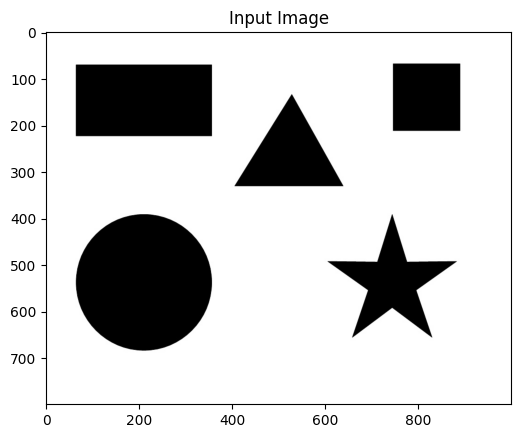

In [3]:
plt.figure(figsize=(6, 6))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image') 

plt.show()

In [4]:
# Convert image to gray
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold of the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours 
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

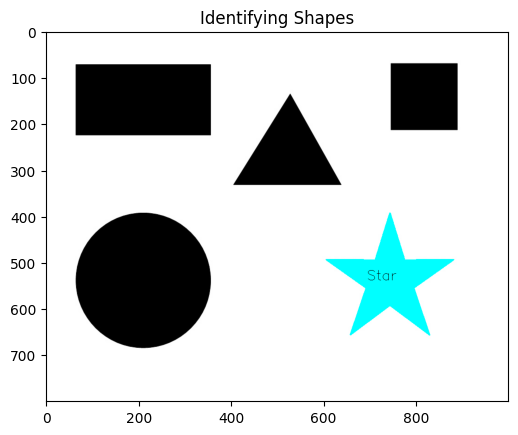

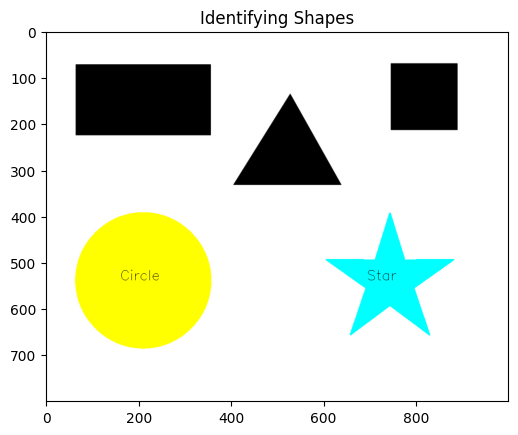

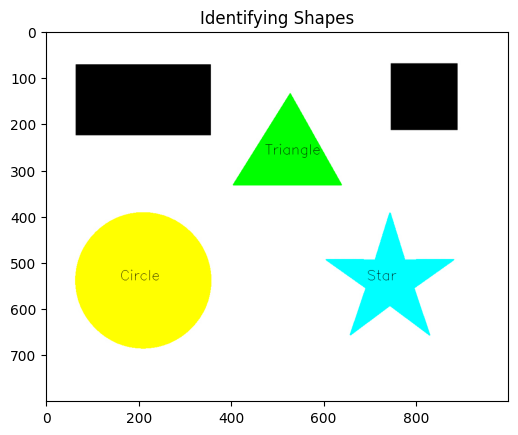

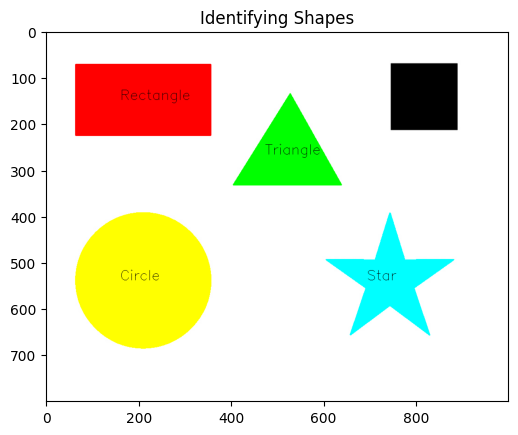

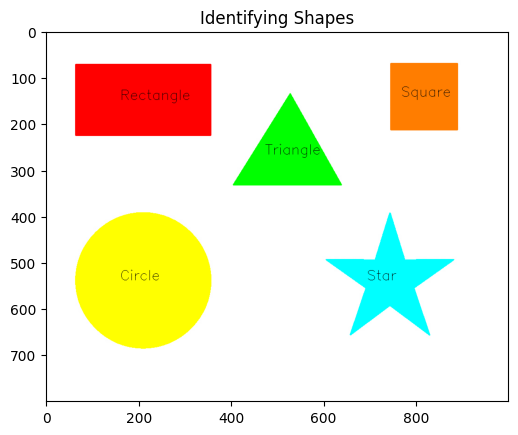

In [5]:
for c in contours[1:]:
    # Get approximate polygons
    approx = cv2.approxPolyDP(c, 0.01*cv2.arcLength(c, True), True)
    
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    if len(approx) == 3:
        shape_name = "Triangle"
        # Draw contour
        cv2.drawContours(image, [c], 0, (0,255,0), -1)
        # Put shape name
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
    
    elif len(approx) == 4:
        # Get bounded box
        x, y, w, h = cv2.boundingRect(c)
        
        # Check to see if 4-side polygon is square or rectangle
        if abs(w-h) <= 3:
            shape_name = "Square"
            # Draw contour
            cv2.drawContours(image, [c], 0, (0, 125 ,255), -1)
            # Put shape name
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
        
        else:
            shape_name = "Rectangle"
            # Draw contour
            cv2.drawContours(image, [c], 0, (0, 0, 255), -1)
            # Put shape name
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
    
    elif len(approx) == 10:
        shape_name = "Star"
        # Draw contour
        cv2.drawContours(image, [c], 0, (255, 255, 0), -1)
        # Put shape name
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)       
        
    elif len(approx) >= 15:
        shape_name = "Circle"
        # Draw contour
        cv2.drawContours(image, [c], 0, (0, 255, 255), -1)
        # Put shape name
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Identifying Shapes') 
    plt.show()